# StainTools demo

Implementation of a few common stain normalization techniques ([Reinhard](http://ieeexplore.ieee.org/document/946629/), [Macenko](http://ieeexplore.ieee.org/document/5193250/), [Vahadane](http://ieeexplore.ieee.org/document/7164042/)) in **Python (tested on 3.5)**. Please refer to the linked papers for details on the methods.

In short do something like (all techniques have the same API, where we create a stain normalization object or *Normalizer*. The fit and transform methods are then the most important).

```
from normalization.reinhard import ReinhardNormalizer
n = ReinhardNormalizer()
n.fit(target_image)
out = n.transform(source_image)
```

This notebook shows example usage. We show the application of the techniques to a few images (in data folder).

**We use the [SPAMS](http://spams-devel.gforge.inria.fr/index.html) (SPArse Modeling Software) package. Use with Python via e.g https://anaconda.org/conda-forge/python-spams.**

One change to the vanilla methods is used. With all images we first apply a brightness standardizing step (below). This is especially useful in handling the more challenging images (which are typically too dim) and does not damage performance for the other images. 

```
def standardize_brightness(I):
    """
    An image is a numpy array of size HxWx3 (RGB) with integer values in the range 0-255 (uint8).
    We standardize so 10% of the elements of this array take the value 255.
    For already bright images this makes little change. For dark images this makes a significant difference,
    :param I:
    :return:
    """
    p = np.percentile(I, 90)
    return np.clip(I * 255.0 / p, 0, 255).astype(np.uint8)
```

In [1]:
from __future__ import division

from utils import visual_utils as vu
from utils import misc_utils as mu
from normalization.reinhard import ReinhardNormalizer
from normalization.macenko import MacenkoNormalizer
from normalization.vahadane import VahadaneNormalizer

%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
i1 = vu.read_image('./data/i1.png')
i2 = vu.read_image('./data/i2.png')
i3 = vu.read_image('./data/i3.png')
i4 = vu.read_image('./data/i4.png')
i5 = vu.read_image('./data/i5.png')
i6 = vu.read_image('./data/i6.png')
stack = vu.build_stack((i1, i2, i3, i4, i5, i6))

# Brightness 'standardization'

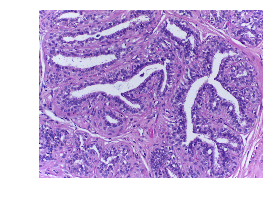

250
227.0


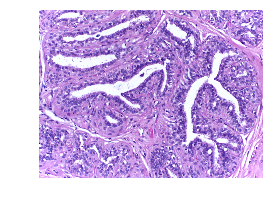

In [23]:
vu.show(i1, fig_size=(4,4))
standard = mu.standardize_brightness(i1)
vu.show(standard, fig_size=(4,4))

# Original images

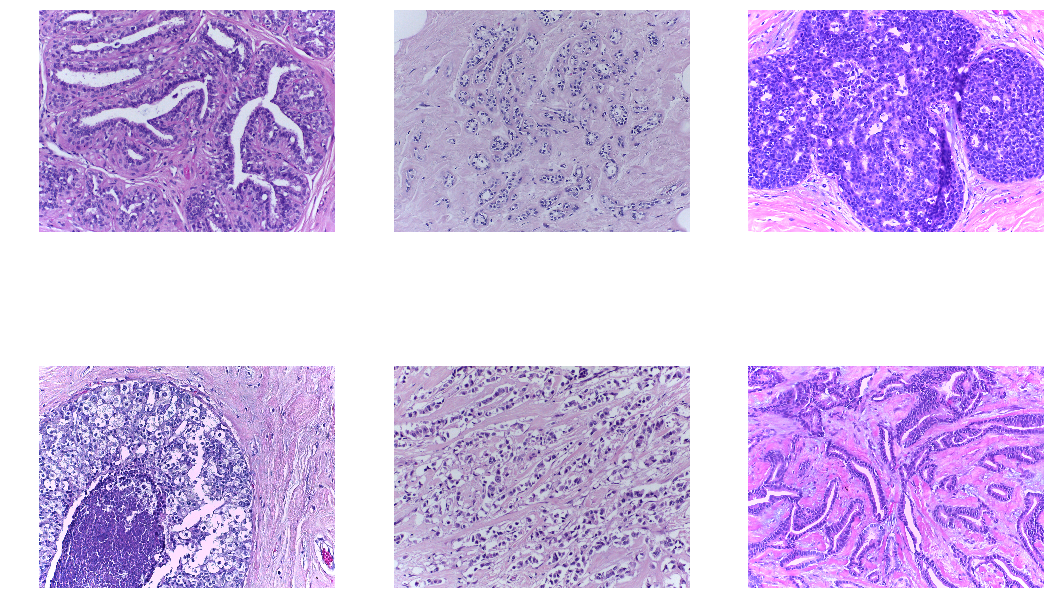

In [4]:
vu.patch_grid(stack, width=3, save_name='./results/original.png')

# Reinhard normalization

In [5]:
n = ReinhardNormalizer()
n.fit(i1)
normalized = vu.build_stack((i1, n.transform(i2), n.transform(
    i3), n.transform(i4), n.transform(i5), n.transform(i6)))

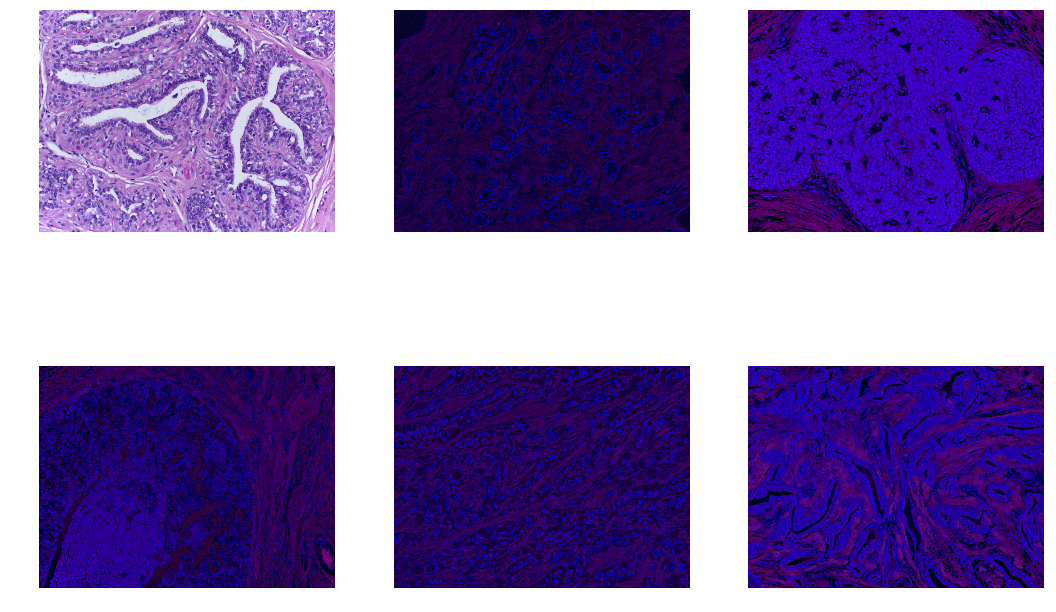

In [6]:
vu.patch_grid(normalized,width=3,save_name='./results/Reinhard.png')

# Macenko normalization

In [7]:
n = MacenkoNormalizer()
n.fit(i1)
normalized = vu.build_stack((i1, n.transform(i2), n.transform(
    i3), n.transform(i4), n.transform(i5), n.transform(i6)))

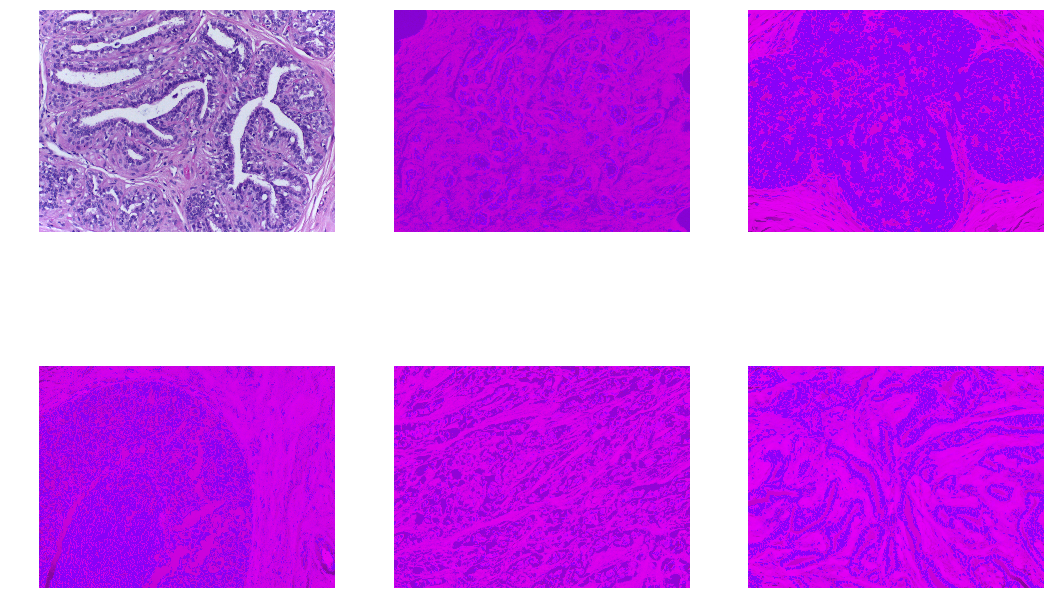

In [8]:
vu.patch_grid(normalized, width=3, save_name='./results/Macenko.png')

## Hematoxylin channel

In [9]:
hemo = vu.build_stack((n.hematoxylin(i1), n.hematoxylin(i2), n.hematoxylin(
    i3), n.hematoxylin(i4), n.hematoxylin(i5), n.hematoxylin(i6)))

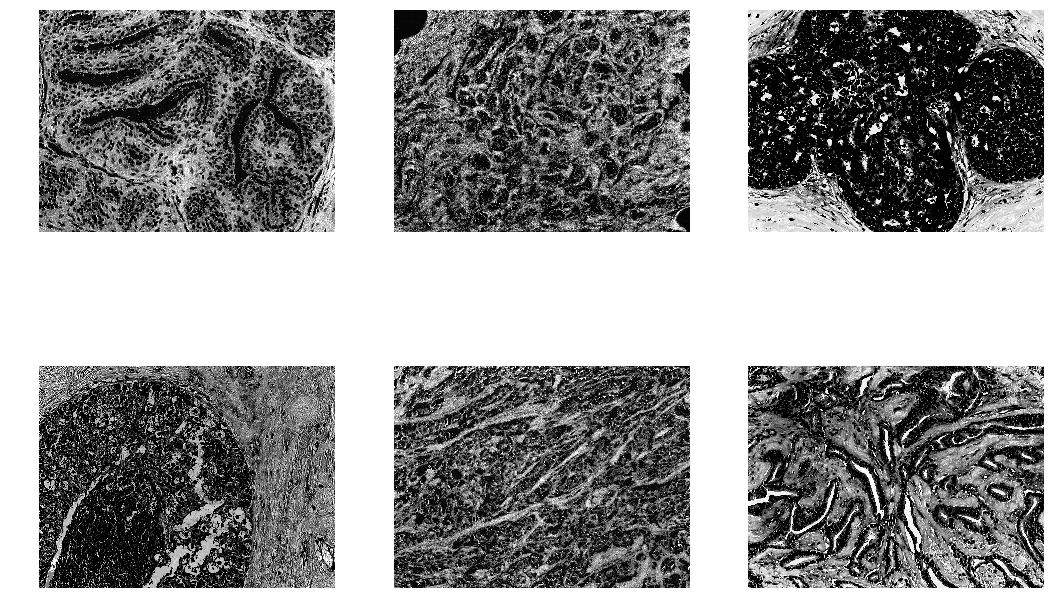

In [10]:
vu.patch_grid(hemo, width=3, save_name='./results/Macenko_hemo.png')

# Vahadane normalization

In [11]:
n = VahadaneNormalizer()
n.fit(i1)
normalized = vu.build_stack((i1, n.transform(i2), n.transform(
    i3), n.transform(i4), n.transform(i5), n.transform(i6)))

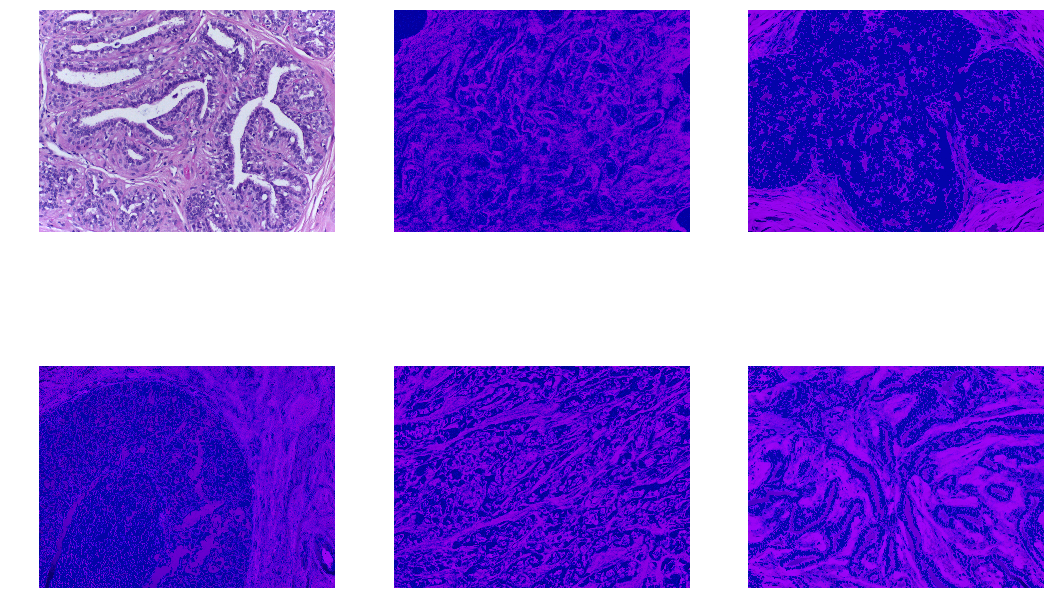

In [12]:
vu.patch_grid(normalized, width=3, save_name='./results/Vahadane.png')

## Hematoxylin channel

In [13]:
hemo = vu.build_stack((n.hematoxylin(i1), n.hematoxylin(i2), n.hematoxylin(
    i3), n.hematoxylin(i4), n.hematoxylin(i5), n.hematoxylin(i6)))

KeyboardInterrupt: 

In [ ]:
vu.patch_grid(hemo, width=3, save_name='./results/Vahadane_hemo.png')

# More challenging images

In [ ]:
i1 = vu.read_image('./data/i1.png')
i7 = vu.read_image('./data/i7.png')
i8 = vu.read_image('./data/i8.png')
i9 = vu.read_image('./data/i9.png')
stack = vu.build_stack((i1, i7, i8, i9))

In [ ]:
vu.patch_grid(stack, width=4, save_name='./results/challenge_original.png')

## Reinhard

In [ ]:
n = ReinhardNormalizer()
n.fit(i1)
normalized = vu.build_stack(
    (i1, n.transform(i7), n.transform(i8), n.transform(i9)))

In [ ]:
vu.patch_grid(normalized, width=4, save_name='./results/challenge_Reinhard.png')

## Macenko

In [ ]:
n = MacenkoNormalizer()
n.fit(i1)
normalized = vu.build_stack(
    (i1, n.transform(i7), n.transform(i8), n.transform(i9)))

In [ ]:
vu.patch_grid(normalized, width=4, save_name='./results/challenge_Macenko.png')

## Vahadane

In [ ]:
n = VahadaneNormalizer()
n.fit(i1)
normalized = vu.build_stack(
    (i1, n.transform(i7), n.transform(i8), n.transform(i9)))

In [ ]:
vu.patch_grid(normalized, width=4, save_name='./results/challenge_Vahadane.png')

# Stain extraction

In [ ]:
n = VahadaneNormalizer()
n.fit(i1)
vu.show_colors(n.fetch_target_stains())
plt.savefig('./results/stains.png')